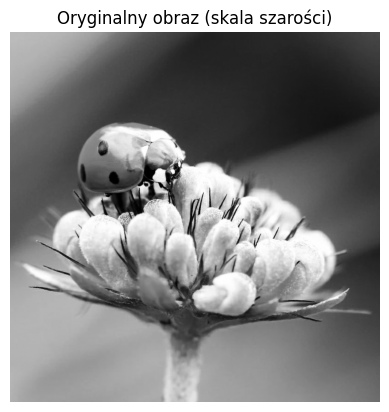

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

# Wczytanie obrazu
A = imread('13.webp')
X = np.mean(A, -1)  # konwersja RGB na skalę szarości

# Wyświetlenie oryginalnego obrazu
img = plt.imshow(X, cmap='gray')
plt.axis('off')
plt.title('Oryginalny obraz (skala szarości)')
plt.show()

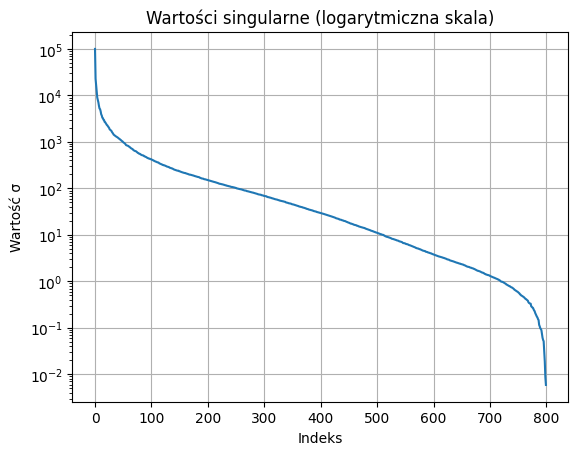

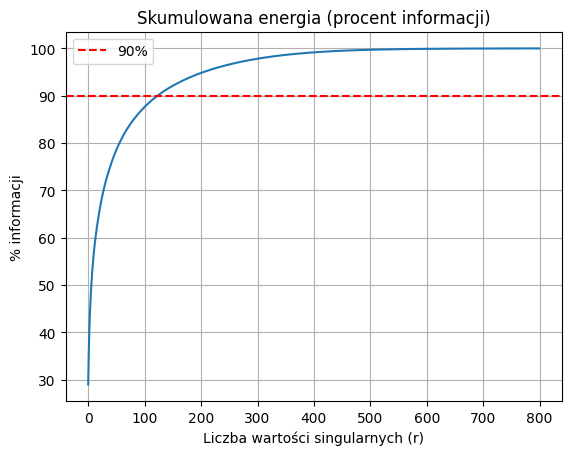

In [2]:
# Obliczenie SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)
S_diag = np.diag(S)

# Wykres wartości singularnych
plt.figure(1)
plt.semilogy(S)
plt.title('Wartości singularne (logarytmiczna skala)')
plt.xlabel('Indeks')
plt.ylabel('Wartość σ')
plt.grid()
plt.show()

# Wykres skumulowanej sumy wartości singularnych (procent informacji)
cumulative_energy = np.cumsum(S) / np.sum(S)
plt.figure(2)
plt.plot(cumulative_energy * 100)
plt.title('Skumulowana energia (procent informacji)')
plt.xlabel('Liczba wartości singularnych (r)')
plt.ylabel('% informacji')
plt.grid()
plt.axhline(y=90, color='r', linestyle='--', label='90%')
plt.legend()
plt.show()

In [3]:
# Znajdź najmniejsze r, dla którego >= 90% energii
threshold = 0.90
r = np.argmax(cumulative_energy >= threshold) + 1
print(f'Liczba wartości singularnych potrzebna do zachowania 90% informacji: r = {r}')
print(f'Procent informacji dla r={r}: {cumulative_energy[r-1]*100:.2f}%')

Liczba wartości singularnych potrzebna do zachowania 90% informacji: r = 124
Procent informacji dla r=124: 90.03%


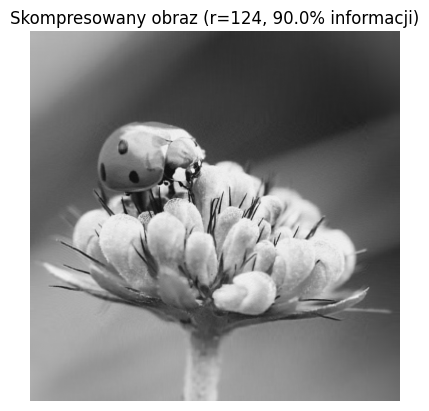

In [4]:
# Rekonstrukcja obrazu z r wartościami singularnymi
X_approx = U[:, :r] @ np.diag(S[:r]) @ VT[:r, :]

# Wyświetlenie skompresowanego obrazu
plt.imshow(X_approx, cmap='gray')
plt.axis('off')
plt.title(f'Skompresowany obraz (r={r}, {cumulative_energy[r-1]*100:.1f}% informacji)')
plt.show()